# Ensembles

The notebook is based on [mlcourse.ai](https://mlcourse.ai/book/topic05/topic05_intro.html) materials

In [1]:
from IPython.display import Image

import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_digits as load
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score

----------

<h3 align="center">Bootstrapping</h3> 


The bootstrap method goes as follows. Let there be a sample $\large X$ of size $\large N$. We can make a new sample from the original sample by drawing $\large N$ elements from the latter randomly and uniformly, with replacement. In other words, we select a random element from the original sample of size $\large N$ and do this $\large N$ times. All elements are equally likely to be selected, thus each element is drawn with the equal probability $\large \frac{1}{N}$.

Let's say we are drawing balls from a bag one at a time. At each step, the selected ball is put back into the bag so that the next selection is made equiprobably i.e. from the same number of balls $\large N$. Note that, because we put the balls back, there may be duplicates in the new sample. Let's call this new sample $\large X_1$.

By repeating this procedure $\large M$ times, we create $\large M$ *bootstrap samples* $\large X_1, \dots, X_M$. In the end, we have a sufficient number of samples and can compute various statistics of the original distribution.

![image](https://github.com/girafe-ai/ml-course/blob/master/week0_05_trees_and_ensembles/img/bootstrap.png?raw=true)


----------

<h3 align="center">Bagging</h3> 


Suppose that we have a training set $\large X$. Using bootstrapping, we generate samples $\large X_1, \dots, X_M$. Now, for each bootstrap sample, we train its own classifier $\large a_i(x)$. The final classifier will average the outputs from all these individual classifiers. In the case of classification, this technique corresponds to voting:
$$\large a(x) = \frac{1}{M}\sum_{i = 1}^M a_i(x).$$

<img src='https://github.com/girafe-ai/ml-course/blob/master/week0_05_trees_and_ensembles/img/bagging.png?raw=1'>

----------

<h3 align="center">Bias-Variance Tradeoff</h3> 

Let's consider a regression problem with base algorithms $\large b_1(x), \dots , b_n(x)$. Assume that there exists an ideal target function of true answers $\large y(x)$ defined for all inputs and that the distribution $\large p(x)$ is defined. We can then express the error for each regression function as follows:  

$$\large \varepsilon_i(x) = b_i(x) - y(x), \quad i = 1, \dots, n$$

And the expected value of the mean squared error:  

$$\large \mathbf{E}_x\left[\left(b_i(x) - y(x)\right)^{2}\right] = \mathbf{E}_x\left[\varepsilon_i^{2}(x)\right].$$

Then, the mean error over all regression functions will look as follows:  
$$ \large \mathbf{E}_1 = \frac{1}{n} \mathbf{E}_x\left[ \sum_i^n \varepsilon_i^{2}(x)\right]$$

We'll assume that the errors are unbiased and uncorrelated, that is: 

$$\large \begin{array}{rcl} \mathbf{E}_x\left[\varepsilon_i(x)\right] &=& 0, \\
\mathbf{E}_x\left[\varepsilon_i(x)\varepsilon_j(x)\right] &=& 0, \quad i \neq j. \end{array}$$

Now, let's construct a new regression function that will average the values from the individual functions: 

$$\large a(x) = \frac{1}{n}\sum_{i=1}^{n}b_i(x)$$

Let's find its mean squared error:

$$\large \begin{array}{rcl}\mathbf{E}_n &=& \mathbf{E}_x\left[\frac{1}{n}\sum_{i=1}^{n}b_i(x)-y(x)\right]^2 \\
&=& \mathbf{E}_x\left[\frac{1}{n}\sum_{i=1}^{n}\varepsilon_i\right]^2 \\
&=& \frac{1}{n^2}\mathbf{E}_x\left[\sum_{i=1}^{n}\varepsilon_i^2(x) + \sum_{i \neq j}\varepsilon_i(x)\varepsilon_j(x)\right] \\
&=& \frac{1}{n}\mathbf{E}_1\end{array}$$

Thus, by averaging the individual answers, we reduced the mean squared error by a factor of $\large n$.

From our previous lesson, let's recall the components that make up the total out-of-sample error:

$$\large \begin{array}{rcl} 
\mathbf{Err}\left(\vec{x}\right) &=& \mathbf{E}\left[\left(y - \hat{f}\left(\vec{x}\right)\right)^2\right] \\
&=& \sigma^2 + f^2 + \mathbf{Var}\left(\hat{f}\right) + \mathbf{E}\left[\hat{f}\right]^2 - 2f\mathbf{E}\left[\hat{f}\right] \\
&=& \left(f - \mathbf{E}\left[\hat{f}\right]\right)^2 + \mathbf{Var}\left(\hat{f}\right) + \sigma^2 \\
&=& \mathbf{Bias}\left(\hat{f}\right)^2 + \mathbf{Var}\left(\hat{f}\right) + \sigma^2
\end{array}$$

Bagging reduces the variance of a classifier by decreasing the difference in error when we train the model on different datasets. In other words, bagging prevents overfitting. The efficiency of bagging comes from the fact that the individual models are quite different due to the different training data and their errors cancel each other out during voting. Additionally, outliers are likely omitted in some of the training bootstrap samples.

In [ ]:
iris = load()
X = iris.data
y = iris.target

f = X.shape[1]

rnd_d3 = DecisionTreeClassifier(max_features=int(f ** 0.5))
d3 = DecisionTreeClassifier()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RandomForestClassifier

sklearn.ensemble._forest.RandomForestClassifier

In [ ]:
d3.fit(X, y)
d3.score(X, y)

1.0

In [ ]:
print("Decision tree:", cross_val_score(d3, X, y).mean())

Decision tree: 0.7791287527081399


In [ ]:
print("Bagging:", cross_val_score(BaggingClassifier(d3), X, y).mean())

Bagging: 0.8781476323119778


In [ ]:
print("Randomized Bagging:", cross_val_score(BaggingClassifier(rnd_d3), X, y).mean())

Randomized Bagging: 0.888195605075828


### Random Forest

### Random Forest from sklearn

In [ ]:
!wget https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/telecom_churn.csv

--2022-03-31 04:36:15--  https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/telecom_churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279997 (273K) [text/plain]
Saving to: ‘telecom_churn.csv’

telecom_churn.csv   100%[===================>] 273.43K  --.-KB/s    in 0.004s  

2022-03-31 04:36:15 (62.1 MB/s) - ‘telecom_churn.csv’ saved [279997/279997]



In [ ]:

df = pd.read_csv("telecom_churn.csv")


cols = []
for i in df.columns:
    if (df[i].dtype == "float64") or (df[i].dtype == 'int64'):
        cols.append(i)


X, y = df[cols].copy(), np.asarray(df["Churn"],dtype='int8')


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


rfc = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True)


results = cross_val_score(rfc, X, y, cv=skf)


print("CV accuracy score: {:.2f}%".format(results.mean()*100))

CV accuracy score: 92.50%


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced')
results = cross_val_score(lr, X, y, cv=skf)


print("CV accuracy score: {:.2f}%".format(results.mean()*100))


CV accuracy score: 68.80%


In [ ]:
from collections import Counter

Counter(y)

Counter({0: 2850, 1: 483})

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
lr.fit(X,y)

LogisticRegression(class_weight='balanced')

In [ ]:
#unbalanced
precision_score(1-y, 1-lr.predict(X))

0.8627331091409355

In [ ]:
#balanced
precision_score(1-y, 1-lr.predict(X))

0.9339039467427485

In [ ]:
#unbalanced
recall_score(1-y, 1-lr.predict(X))

0.9901754385964913

In [ ]:
#balanced
recall_score(1-y, 1-lr.predict(X))

0.6891228070175439

In [ ]:
#unbalanced
precision_score(y, lr.predict(X))

0.5483870967741935

In [ ]:
#balanced
precision_score(y, lr.predict(X))

0.27967479674796747

In [ ]:
#unbalanced
recall_score(y, lr.predict(X))

0.07039337474120083

In [ ]:
#balanced
recall_score(y, lr.predict(X))

0.7122153209109731

In [ ]:
from collections import Counter

In [ ]:
Counter(y)

Counter({0: 2850, 1: 483})

In [ ]:
R

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
trees_grid = [5, 10, 15, 20, 30, 50, 75, 100, 200]


for ntrees in trees_grid:
    rfc = RandomForestClassifier(n_estimators=ntrees, random_state=42, n_jobs=-1, oob_score=True)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} trees".format(max(test_acc.mean(axis=1))*100, 
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 92.50% with 100 trees


Text(0.5, 0, 'N_estimators')

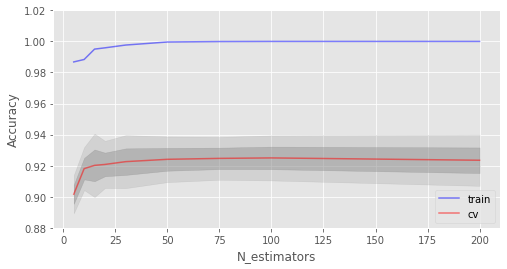

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(trees_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(trees_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(trees_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(trees_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("N_estimators")

Let's select max_depth:

In [ ]:

train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]


for max_depth in max_depth_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, oob_score=True, max_depth=max_depth)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_depth".format(max(test_acc.mean(axis=1))*100, 
                                                        max_depth_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 92.44% with 24 max_depth


Text(0.5, 0, 'Max_depth')

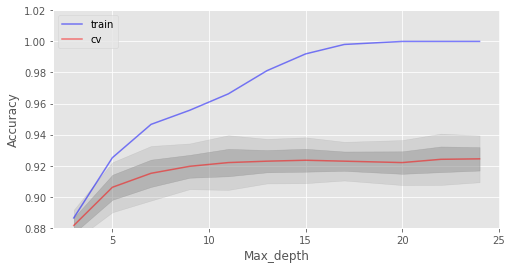

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_depth_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_depth_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_depth")

In [ ]:

train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
min_samples_leaf_grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]


for min_samples_leaf in min_samples_leaf_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, 
                                 oob_score=True, min_samples_leaf=min_samples_leaf)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} min_samples_leaf".format(max(test_acc.mean(axis=1))*100, 
                                                        min_samples_leaf_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 92.50% with 1 min_samples_leaf


Text(0.5, 0, 'Min_samples_leaf')

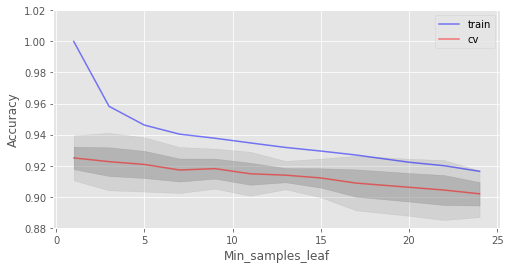

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(min_samples_leaf_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(min_samples_leaf_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Min_samples_leaf")

In [ ]:
parameters = {'max_features': [4, 7, 10, 13], 'min_samples_leaf': [1, 3, 5, 7], 'max_depth': [5,10,15,20]}
rfc = RandomForestClassifier(n_estimators=100, random_state=42, 
                             n_jobs=-1, oob_score=True)
gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv.fit(X, y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [4, 7, 10, 13],
                         'min_samples_leaf': [1, 3, 5, 7]},
             verbose=1)

In [ ]:
gcv.best_params_

{'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 3}

In [ ]:
gcv.score(X, y)

0.9606960696069607

Overfitting?

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
%%time

for n_estimators in [10, 40, 100, 200, 600, 1000]:
    clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=n_estimators, n_jobs=4)
    clf = clf.fit(X_train, y_train)
    train_acc, test_acc = accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)
    print('n_estimators = %4s train_acc = %4s test_acc = %4s' %(n_estimators, train_acc, test_acc))

n_estimators =   10 train_acc = 0.9898762654668166 test_acc = 0.9174174174174174
n_estimators =   40 train_acc = 0.9996250468691413 test_acc = 0.9264264264264265
n_estimators =  100 train_acc = 0.9996250468691413 test_acc = 0.9294294294294294
n_estimators =  200 train_acc =  1.0 test_acc = 0.924924924924925
n_estimators =  600 train_acc =  1.0 test_acc = 0.9264264264264265
n_estimators = 1000 train_acc =  1.0 test_acc = 0.924924924924925
CPU times: user 3.78 s, sys: 247 ms, total: 4.03 s
Wall time: 39.2 s


In [ ]:
%%time

for n_estimators in [10, 40, 100, 200, 600, 1000]:
    clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7), n_estimators=n_estimators, n_jobs=4)
    clf = clf.fit(X_train, y_train)
    train_acc, test_acc = accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)
    print('n_estimators = %4s train_acc = %4s test_acc = %4s' %(n_estimators, train_acc, test_acc))

n_estimators =   10 train_acc = 0.9463817022872141 test_acc = 0.9234234234234234
n_estimators =   40 train_acc = 0.9490063742032246 test_acc = 0.924924924924925
n_estimators =  100 train_acc = 0.94750656167979 test_acc = 0.9279279279279279
n_estimators =  200 train_acc = 0.9478815148106486 test_acc = 0.924924924924925
n_estimators =  600 train_acc = 0.9482564679415073 test_acc = 0.924924924924925
n_estimators = 1000 train_acc = 0.9478815148106486 test_acc = 0.924924924924925
CPU times: user 3.35 s, sys: 108 ms, total: 3.46 s
Wall time: 25.2 s


In [ ]:
%%time

for n_estimators in [10, 40, 100, 200, 600, 1000]:
    clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=14), n_estimators=n_estimators, n_jobs=4)
    clf = clf.fit(X_train, y_train)
    train_acc, test_acc = accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)
    print('n_estimators = %4s train_acc = %4s test_acc = %4s' %(n_estimators, train_acc, test_acc))

n_estimators =   10 train_acc = 0.9797525309336333 test_acc = 0.9069069069069069
n_estimators =   40 train_acc = 0.9835020622422197 test_acc = 0.9054054054054054
n_estimators =  100 train_acc = 0.9868766404199475 test_acc = 0.9099099099099099
n_estimators =  200 train_acc = 0.9850018747656543 test_acc = 0.9069069069069069
n_estimators =  600 train_acc = 0.9861267341582303 test_acc = 0.9069069069069069
n_estimators = 1000 train_acc = 0.9857517810273716 test_acc = 0.9084084084084084
CPU times: user 2.44 s, sys: 1.05 s, total: 3.49 s
Wall time: 19.5 s


### Out-of-bag error

In case of Random Forest, there is no need to use cross-validation or hold-out samples in order to get an unbiased error estimation. Why? Because, in ensemble techniques, the error estimation takes place internally.
 
Random trees are constructed using different bootstrap samples of the original dataset. Approximately 37% of inputs are left out of a particular bootstrap sample and are not used in the construction of the $\large k$-th tree.

This is easy to prove. Suppose there are $\large \ell$ examples in our dataset. At each step, each data point has equal probability of ending up in a bootstrap sample with replacement, probability $\large\frac{1}{\ell}.$ The probability that there is no such bootstrap sample that contains a particular dataset element (i.e. it has been omitted $\large \ell$ times) equals $\large (1 - \frac{1}{\ell})^\ell$. When $\large \ell \rightarrow +\infty$, it becomes equal to the [Second Remarkable Limit](https://en.wikipedia.org/wiki/List_of_limits) $\large \frac{1}{e}$. Then, the probability of selecting a specific example is $\large \approx  1 - \frac{1}{e} \approx 63\%$.

Let's visualize how **O**ut-**o**f-**B**ag **E**rror (or OOBE) estimation works:

<img src='https://github.com/girafe-ai/ml-course/blob/master/week0_05_trees_and_ensembles/img/oob.png?raw=1' width=700>

The top part of the figure above represents our original dataset. We split it into the training (left) and test (right) sets. In the left image, we draw a grid that perfectly divides our dataset according to classes. Now, we use the same grid to estimate the share of the correct answers on our test set. We can see that our classifier gave incorrect answers in those 4 cases that have not been used during training (on the left). Hence, the accuracy of our classifier is $\large \frac{11}{15}*100\% = 73.33\%$.

To sum up, each base algorithm is trained on $\large \approx 63\%$ of the original examples. It can be validated on the remaining $\large \approx 37\%$. The Out-of-Bag estimate is nothing more than the mean estimate of the base algorithms on those $\large \approx 37\%$ of inputs that were left out of training. 



$$\lim_{l \rightarrow +\infty} (1-\dfrac{1}{l})^l = \dfrac{1}{e}$$

$p = 1 - \dfrac{1}{e} \approx 63\%$.